# 6.2 Exploring Relationship

## 01. Importing Visualization Libraries and Data
## 02. Correlations
## 03. Scatterplots
## 04. Pair Plot
## 05. Categorical Plot
## 06. Questions
## 07. Hypotheses
## 08. Export Data

# 01. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/brianyoo/Downloads/CF'

In [3]:
df_clean = pd.read_csv(os.path.join(path, 'Task 6.1', 'USA_cars_datasets.csv'), index_col = 0)

In [4]:
df_clean.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours


# 02. Correlations

In [5]:
sub = df_clean[['price', 'brand', 'year', 'mileage', 'state', 'condition']]

In [6]:
sub_2 = df_clean[['price', 'year', 'mileage']]

In [7]:
sub_2.head()

,price,year,mileage
0,6300,2008,274117.0
1,2899,2011,190552.0
2,5350,2018,39590.0
3,25000,2014,64146.0
4,27700,2018,6654.0


In [8]:
sub.head()

,price,brand,year,mileage,state,condition
0,6300,toyota,2008,274117.0,new jersey,10 days
1,2899,ford,2011,190552.0,tennessee,6 days
2,5350,dodge,2018,39590.0,georgia,2 days
3,25000,ford,2014,64146.0,virginia,22 hours
4,27700,chevrolet,2018,6654.0,florida,22 hours


In [9]:
sub_2.corr()

,price,year,mileage
price,1.000000,0.384664,-0.387727
year,0.384664,1.000000,-0.599986
mileage,-0.387727,-0.599986,1.000000


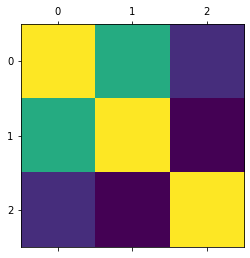

In [10]:
plt.matshow(sub_2.corr())

In [11]:
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

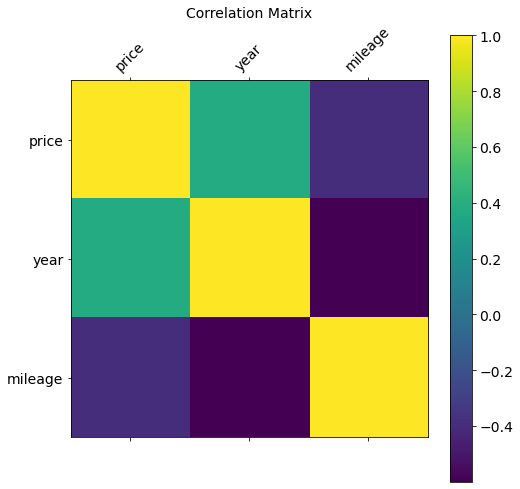

In [12]:

f = plt.figure(figsize = (8, 8)) # figure size 
plt.matshow(sub_2.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub_2.shape[1]), sub_2.columns, fontsize = 14, rotation = 45) # x axis labels
plt.yticks(range(sub_2.shape[1]), sub_2.columns, fontsize = 14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

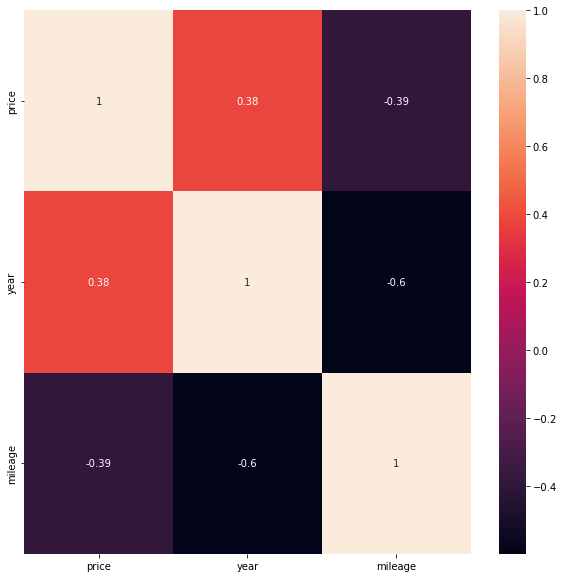

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Above heatmap shows that year and mileage are negatively related (strong). When I consider each variable's and heatmap's characteristic, I may intepret this result as follow "The number of used cars has risen in the used car market in recent years, and the average mileage of used cars on sale is not much different".

And heatmap also shows that year and price are positively related (moderate). When I exclude car's brand and model, and only consider rhe relationship between year and price, I could interpret this result as follow "The overall average price of used car in the market rises over time".


# 03. Scatterplots

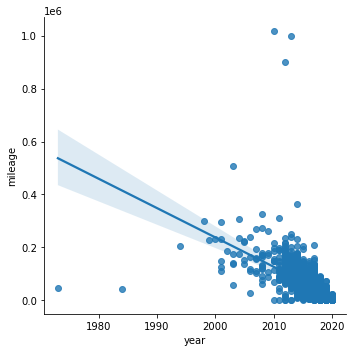

In [14]:
sns.lmplot(x = 'year', y = 'mileage', data = sub_2)

As I expected, the majority number of plots are clustering the year between 2000 abd 2020 with the range of 0 to 0.4. When I think of the main factors that made this result, I believe the density of plots in 2000, 2010, and 2020 and the overal increas in price (when people sell their cars to used car market). 

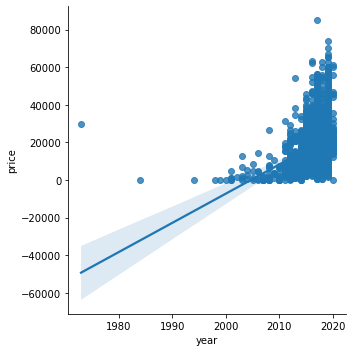

In [15]:
sns.lmplot(x = 'year', y = 'price', data = sub_2)

This scatter plot shows moderate positive relationship between year and price. The plots are highely densed around the trend line.

# 04. Pair Plot

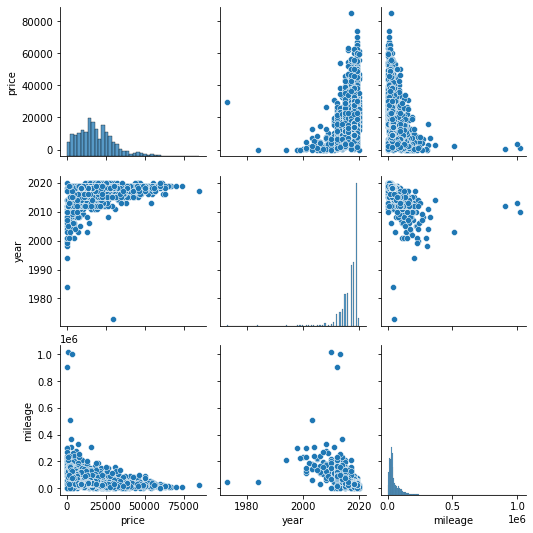

In [16]:
pair_plot = sns.pairplot(sub_2)

The mileage with price and mileage with year are negatively related and only price with year shows that
they are positively related. Before 2000, plots are barely exist, and the price and the umber of cars have been dramatically increasing since 2000. Based on US's geographical, historical, and cultural characteristic, I am acknowledged US's used car market is bound to be brisk. However, the data shows me unexpected result, so I would like to investigate more about relationship between mileage and year in 1980s and 1990s.

# 05. Categorical Plot

<AxesSubplot:xlabel='price', ylabel='Count'>

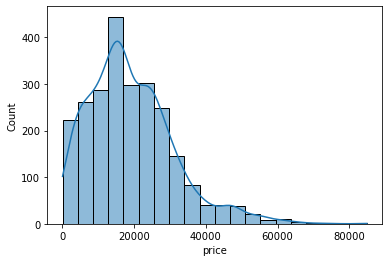

In [17]:
sns.histplot(sub_2['price'], bins = 20, kde = True)

In [18]:
sub_2.loc[sub_2['price'] < 10000, 'price range'] = 'Low price'
sub_2.loc[(sub_2['price'] >=10000) & (sub_2['price'] < 30000), 'price range'] = 'Middle price'
sub_2.loc[sub_2['price'] >= 30000, 'price range'] = 'High price'

/var/folders/r6/p5vtydpn7y13mfc6k8mg60_w0000gn/T/ipykernel_4452/3874662284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2.loc[sub_2['price'] < 10000, 'price range'] = 'Low price'


In [19]:
sub_2['price range'].value_counts()


Middle price    1512
Low price        566
High price       378
Name: price range, dtype: int64

In [20]:
sub_2.columns

Index(['price', 'year', 'mileage', 'price range'], dtype='object')

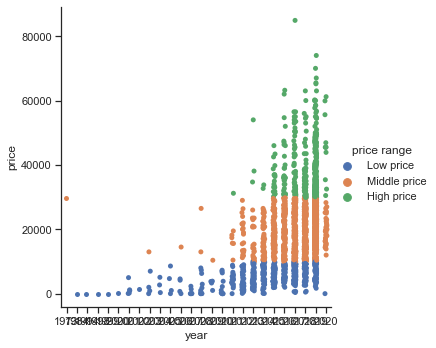

In [21]:
sns.set(style="ticks")
ca_plot = sns.catplot(x = "year", y = "price", hue = "price range", data = sub_2)

Before 2000, middle price used cars barely exist and high price used cars are only exist between 2010 and 2020. If i compare this result with car's brand or/and model, I may get more solid insights about this result.

# 06. Questions (Because onlu numeric variables are included on this task, answering all of questions I made was not possible)

1. The relationship of price and mileage


Mileage and price are negatively related. When price goes up, the mileage goes down. The cars have relatively high mileage were mostly found below the price of 12000. However, these two variables ahve moderate relatioship (-0.39), exceptions may be found.

2. Car price by the year


Car price has been increasing annually, and this is not because of expensive car brands or models. The factor(s) that devote incrasing car price may be found by other variables. More investigation is needed.

# 07. Hypotheses

If the number of used cars in the market rises, the average price of used car will be dropped.

If cars's aeverage mileage in the market decrease, the the average price of used car will be rising.

# 08. Export Data

In [22]:
sub_2.to_csv(os.path.join(path, 'Task 6.1', 'USA_cars_sub_2.csv'))